In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
new_data = pd.read_csv("DLBCL.csv")
print(new_data.shape)

(79, 7071)


## 1. Mutual Info[F1] 
## 2. F Classif[F2] 
## 3.T-Test[F3]

## (c) 2. F2( N features ) → F3( 2N/3 features out of selected features from F2) →    
##           F1(N/3 features out of selected features from F3)

# Preprocessing

In [3]:
df = new_data.iloc[2:,:] # Removes first two tubles
print(df[df.columns[-1]].unique())
#Categorical to Numerical Data Conversion
df[df.columns[-1]] = pd.factorize(df[df.columns[-1]])[0]
print('Updated value of target class : '+str(df[df.columns[-1]].unique()))

['DLBCL' 'FL']
Updated value of target class : [0 1]


In [4]:
print('Required data set ')
df.head()

Required data set 


,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
2,-1,-45,176,97,-57,233,265,945,56,819,...,1036,-161,1523,-72,897,366,3,76,-28,0
3,25,-17,531,353,122,155,209,1688,42,639,...,4254,-75,6056,-68,737,81,-4,41,-45,0
4,73,91,257,80,614,507,760,2252,196,863,...,1934,-129,2901,-9,946,450,38,164,-62,0
5,267,41,202,138,198,355,245,1469,170,384,...,2469,93,2465,-119,339,321,-63,73,-13,0
6,16,24,187,39,145,254,571,930,-11,439,...,608,-39,1667,-87,721,213,15,155,-26,0


In [5]:
df.isnull().sum()

A28102         0
AB000114_at    0
AB000115_at    0
AB000220_at    0
AB000409_at    0
              ..
Z17240_at      0
L49218_f_at    0
M71243_f_at    0
Z78285_f_at    0
class          0
Length: 7071, dtype: int64

In [6]:
feature_set = df.drop(df.columns[-1], 1)
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['A28102', 'AB000114_at', 'AB000115_at', 'AB000220_at', 'AB000409_at', 'AB000449_at', 'AB000450_at', 'AB000460_at', 'AB000462_at', 'AB000464_at', 'AB000466_at', 'AB000467_at', 'AB000468_at', 'AB000584_at', 'AB000895_at', 'AB000896_at', 'AB000897_at', 'AB000905_at', 'AB001106_at', 'AB001325_at', 'AB002314_at', 'AB002315_at', 'AB002318_at', 'AB002365_at', 'AB002366_at', 'AB002380_at', 'AB002382_at', 'AB002409_at', 'AB002559_at', 'AB003102_at', 'AB003103_at', 'AB003177_at', 'AB003698_at', 'AB004884_at', 'AB006190_at', 'AC000061_cds2_at', 'AC000061_cds3_at', 'AC000062_at', 'AC000064_cds1_at', 'AC000064_cds2_at', 'AC000066_at', 'AC000099_at', 'AC000115_cds1_at', 'AC002045_xpt1_at', 'AC002073_cds1_at', 'AC002077_at', 'AC002086_at', 'AC002115_cds1_at', 'AC002115_cds3_at', 'AC002115_cds4_at', 'AC002115_rna2_at', 'AC002450_at', 'AC002464_at', 'AC002486_at', 'AD000092_cds1_at', 'AD000092_cds2_at', 'AD000684_cds1_at', 'AD001527_cds1_at', 'AF000177_at', 'AF000231_at', 'AF000234_at'

In [7]:
feature_set.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,-1,-45,176,97,-57,233,265,945,56,819,...,132,1036,-161,1523,-72,897,366,3,76,-28
3,25,-17,531,353,122,155,209,1688,42,639,...,147,4254,-75,6056,-68,737,81,-4,41,-45
4,73,91,257,80,614,507,760,2252,196,863,...,169,1934,-129,2901,-9,946,450,38,164,-62
5,267,41,202,138,198,355,245,1469,170,384,...,13,2469,93,2465,-119,339,321,-63,73,-13
6,16,24,187,39,145,254,571,930,-11,439,...,69,608,-39,1667,-87,721,213,15,155,-26


In [8]:
target_feature = df[df.columns[-1]]
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: class, dtype: int64

In [9]:
temp_feature_set=StandardScaler().fit_transform(feature_set)
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.730817,-0.292937,-0.431595,-0.567503,-0.809531,-0.456305,-0.293827,-0.784873,-0.384965,0.213520,...,-0.469899,-0.282291,0.190071,-0.188077,0.520833,0.141759,0.384881,0.518999,0.206599,0.584699
1,-0.570425,-0.117207,0.149112,0.973353,-0.130132,-0.755853,-0.542402,0.134863,-0.448168,-0.154563,...,-0.355832,3.320297,0.446154,1.934349,0.534848,-0.065095,-0.553796,0.492245,0.059613,0.525299
2,-0.274317,0.560607,-0.299096,-0.669825,1.737265,0.595954,1.903393,0.833021,0.247067,0.303496,...,-0.188533,0.723030,0.285358,0.457126,0.741570,0.205108,0.661544,0.652770,0.576164,0.465899
3,0.922455,0.246804,-0.389065,-0.320725,0.158327,0.012219,-0.382604,-0.136230,0.129690,-0.676015,...,-1.374836,1.321969,0.946409,0.252983,0.356156,-0.579645,0.236669,0.266747,0.194000,0.637111
4,-0.625946,0.140111,-0.413602,-0.916603,-0.042835,-0.375657,1.064455,-0.803441,-0.687438,-0.563545,...,-0.948983,-0.761442,0.553352,-0.120654,0.468276,-0.085781,-0.119040,0.564864,0.538367,0.591687


# Training and Spilting of Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((61, 7070), (16, 7070))

In [11]:
y_train.shape, y_test.shape

((61,), (16,))

In [12]:
columns = feature_set.shape[1]

number_of_features_required_1 = 2*(columns/3)
number_of_features_required_2 = columns/3
number_of_features_required_3 = 0.19*columns

print('number_of_features_required_1 : '+str(number_of_features_required_1))
print('number_of_features_required_2 : '+str(number_of_features_required_2))
print('number_of_features_required_3 : '+str(number_of_features_required_3))

number_of_features_required_1 = int(number_of_features_required_1)
number_of_features_required_2 = int(number_of_features_required_2)
number_of_features_required_3 = int(number_of_features_required_3)

print('number_of_features_required_1 in integers: '+str(number_of_features_required_1))
print('number_of_features_required_2 in integers: '+str(number_of_features_required_2))
print('number_of_features_required_3 in integers: '+str(number_of_features_required_3))

number_of_features_required_1 : 4713.333333333333
number_of_features_required_2 : 2356.6666666666665
number_of_features_required_3 : 1343.3
number_of_features_required_1 in integers: 4713
number_of_features_required_2 in integers: 2356
number_of_features_required_3 in integers: 1343


# Selection of features using F Classification 

In [13]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: #Here, we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i] # It is storing the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features_fc = correlation(X_train, 0.5)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :504.9670615196228 seconds


In [14]:
print('Length of selected features : '+str(len(selected_features_fc)))

Length of selected features : 6923


In [15]:
selected_features_fc = list(selected_features_fc)
print('Selected features using F classification')
print(selected_features_fc)

Selected features using F classification
['U07807_at', 'U58334_at', 'HG613-HT613_at', 'X90999_at', 'HG2639-HT2735_s_at', 'U94836_at', 'HG3299-HT3476_at', 'U94333_at', 'M87339_at', 'HG1728-HT1734_s_at', 'M87860_at', 'U11732_at', 'U25041_at', 'HG4533-HT4938_at', 'D64015_at', 'Y10515_at', 'Z35278_at', 'Z15115_at', 'X80818_at', 'D89667_at', 'U65402_at', 'X85781_s_at', 'D90086_at', 'X93512_at', 'S78296_at', 'L40371_at', 'D79205_at', 'M68874_at', 'U35735_at', 'U50360_s_at', 'L00352_at', 'U08336_at', 'X05908_at', 'Z27113_at', 'HG4169-HT4439_s_at', 'HG3431-HT3616_s_at', 'D17357_at', 'D30036_at', 'M22490_at', 'D86975_at', 'S75313_at', 'M24748_cds2_s_at', 'L76224_at', 'U58096_at', 'D87116_at', 'S94421_at', 'M87284_at', 'U83600_at', 'X59656_at', 'L78440_at', 'U23028_at', 'M96803_at', 'M23294_at', 'U73477_s_at', 'U16296_at', 'U33821_at', 'L00635_at', 'X99728_at', 'X59417_at', 'S48983_at', 'HG3495-HT3689_at', 'L34219_at', 'U19517_at', 'U23143_at', 'U66052_at', 'U50822_rna1_s_at', 'D79206_s_at', 'L4

In [16]:
required_features_fc = selected_features_fc[:number_of_features_required_1]
print('Length of required features : '+str(len(required_features_fc)))

Length of required features : 4713


In [17]:
X_train1 = X_train[required_features_fc]
X_train1.head()

,U07807_at,U58334_at,HG613-HT613_at,X90999_at,HG2639-HT2735_s_at,U94836_at,HG3299-HT3476_at,U94333_at,M87339_at,HG1728-HT1734_s_at,...,M73547_at,U56833_at,X75315_at,U63336_at,U48250_at,X14346_at,X97065_at,M83652_s_at,X65724_at,U05681_s_at
22,-0.521450,-0.642057,1.422335,0.495079,-0.651930,-0.039575,0.299036,0.918677,-0.546937,-0.475775,...,-0.617238,1.838389,-0.305661,0.200321,0.819892,1.612562,0.824782,-0.838706,-0.243537,-1.249526
41,-0.129909,-0.381599,0.816726,0.219025,-0.417305,0.398555,0.401123,0.967438,0.420365,-1.087991,...,-0.656118,0.162022,0.437222,0.057542,-1.047153,-2.031976,1.212173,0.102304,-0.432138,0.477802
50,-0.213810,1.145829,-0.121339,0.276804,-0.815795,0.252512,0.207157,0.255522,1.383239,0.228461,...,0.233243,-0.132908,-1.026033,-0.140506,0.216474,0.627922,0.634485,-0.134357,0.618640,-0.372261
38,-4.968246,1.348898,-1.977265,-1.360257,-0.555100,-1.764007,-2.768682,-3.494226,-0.305665,0.492628,...,-0.267326,-1.104804,-2.900125,-2.199280,-2.261086,-0.596042,0.066992,-0.556967,0.874598,2.244573
61,0.019250,-0.929001,-0.531464,-1.032845,0.059394,-1.803327,-2.635968,-2.621398,-1.881680,0.174000,...,-1.076499,-1.249977,-1.740777,-0.573447,-2.317879,-1.888383,-1.791802,-1.988205,3.312942,0.832788


# Feature Selection Using T-Test

In [18]:
import statistics

In [23]:
temp_index = required_features_fc + ['class']
new_df = df[temp_index]
new_df.shape

(77, 4714)

In [24]:
start_time_t = time.time()
x= new_df.values                # It is converting df into numpy arrray

a,b = x.shape              # Here, a is taking row and b is taking columns 

n1 =0;
n2 = 0;

for i in range(a):      
    if x[i][b-1] == 1:
        n1+=1;
    else:
        n2+=1;


sample_1 = []
sample_2= []
tval=[]

# It is calculating t value 

for j in range(1,b-1):      
    for i in range(a):

        if x[i][b-1]== 1:           
            sample_1.append(x[i][j])
        else:
            sample_2.append(x[i][j])


# It is converting sample values from string to integer
    sample_1 = list(map(int,sample_1))       
    sample_2 = list(map(int,sample_2))


    s1_bar = statistics.mean(sample_1)          
    s2_bar = statistics.mean(sample_2)

    s1_var = statistics.variance(sample_1)      
    s2_var = statistics.variance(sample_2)



    t = abs(s1_bar - s2_bar)/np.sqrt(s1_var/n1+s2_var/n2)         # It is calculating t value by comparing mean and variance using given formula

    tval.append(t)       

    sample_1.clear()      
    sample_2.clear()



new_index=[]

new_index = sorted(range(len(tval)), key=lambda k: tval[k])   

new_index.reverse()     

required_features_t = new_index[:number_of_features_required_2]  #It is selecting important features
print('Time taken by T Test is :'+str(time.time() - start_time_t)+' seconds')

Time taken by T Test is :4.507948637008667 seconds


In [25]:
print(required_features_t)

[745, 4176, 1119, 3777, 2903, 650, 334, 3297, 477, 394, 4387, 935, 195, 3502, 1587, 3428, 823, 4058, 2414, 775, 3931, 3447, 1537, 3846, 2364, 466, 397, 3798, 3085, 845, 3954, 2400, 2994, 2431, 3802, 1378, 3513, 1998, 1721, 62, 3245, 929, 1328, 1913, 531, 3566, 4379, 3381, 3021, 104, 4322, 545, 1441, 2352, 1023, 660, 103, 3655, 3912, 1617, 4205, 2812, 2254, 589, 3192, 1899, 2958, 3504, 920, 4131, 1969, 366, 1249, 3353, 320, 3584, 1469, 3877, 4398, 2933, 1222, 3599, 4026, 2680, 2990, 822, 3341, 3053, 1050, 4483, 988, 3757, 113, 1878, 2761, 346, 119, 7, 2111, 712, 3498, 232, 1390, 401, 4620, 4194, 1393, 2560, 1923, 1627, 1034, 3833, 3574, 3926, 1303, 57, 3129, 2155, 860, 4146, 4330, 4201, 2976, 4496, 2361, 4310, 4309, 3216, 1474, 497, 1605, 3947, 4645, 1835, 2927, 3726, 3113, 518, 124, 1964, 3126, 632, 1099, 294, 3264, 3759, 247, 533, 898, 2999, 2834, 762, 2642, 524, 682, 3370, 234, 2576, 76, 4486, 4682, 1457, 1467, 697, 4696, 3326, 3368, 105, 4641, 628, 4340, 164, 1596, 4321, 1389, 4150,

In [26]:
df1 = df.iloc[:,required_features_t]
selected_features_tt=list(df1)
print('Length of selected_features_tt : ',len(selected_features_tt))

Length of selected_features_tt :  2356


In [27]:
print('selected_features_tt :',selected_features_tt)

selected_features_tt : ['HG1614-HT1614_at', 'X52520_at', 'L00354_at', 'U82313_at', 'U26591_at', 'D87437_at', 'D38500_at', 'U51903_at', 'D63879_at', 'D49490_at', 'X66867_cds1_at', 'HG4316-HT4586_at', 'D16217_at', 'U65932_at', 'L76687_at', 'U60665_at', 'HG3039-HT3200_at', 'X12453_at', 'S71824_at', 'HG2280-HT2376_at', 'U95740_rna2_at', 'U62136_at', 'L41351_at', 'U89278_at', 'M98447_rna1_at', 'D63485_at', 'D49738_at', 'U83463_at', 'U39231_at', 'HG3299-HT3476_at', 'V01515_cds1_at', 'S67798_at', 'U32849_at', 'S75295_at', 'U83908_at', 'L27050_at', 'U66406_at', 'M59465_at', 'M19684_at', 'AF000545_at', 'U49352_at', 'HG4258-HT4528_at', 'L20814_at', 'M34192_at', 'D80007_at', 'U69141_at', 'X66403_at', 'U58087_at', 'U34605_at', 'D00632_at', 'X63187_at', 'D82348_at', 'L35545_at', 'M96982_at', 'J03600_at', 'D87449_at', 'D00596_at', 'U77643_at', 'U93237_rna2_at', 'M11353_at', 'X54673_at', 'U18932_at', 'M86868_at', 'D85758_at', 'U46499_at', 'M33521_at', 'U30872_at', 'U66036_at', 'HG4165-HT4435_at', 'X1

In [28]:
X_train2 = X_train.iloc[:,required_features_t]
X_train2.head()

,HG1614-HT1614_at,X52520_at,L00354_at,U82313_at,U26591_at,D87437_at,D38500_at,U51903_at,D63879_at,D49490_at,...,X81438_at,K01383_at,M31153_at,U67369_at,U03399_at,U22526_at,M74558_at,M22638_at,L29376_at,K03430_at
22,-0.173754,-0.783254,-0.132223,0.196053,0.146828,-0.194936,0.575769,-0.497717,0.341014,-0.730837,...,0.595789,-0.594861,0.959396,-0.496678,0.125964,-1.115927,-0.473902,-0.238173,-1.471987,-0.649905
41,-0.266758,-0.303783,-0.214164,-0.441520,0.950924,0.671071,0.564058,1.410086,-0.028341,1.112676,...,0.582663,-0.793188,-0.217595,-0.478400,-0.126767,0.700717,-0.473902,-0.101713,-0.089948,-0.577043
50,-0.398381,-0.749006,0.431122,-0.215284,1.207654,0.865923,-0.003955,1.161560,-0.016029,0.355838,...,0.247947,-0.126090,0.875016,-1.319201,0.366323,0.876238,-0.330239,-0.199185,-1.590447,-0.314497
38,-0.327052,0.689406,-2.559726,-1.819501,-3.428008,0.567150,-2.094474,2.126426,1.304417,2.731182,...,-0.775890,1.145000,-0.812581,2.482680,0.426413,1.121968,-3.002372,-0.581762,-0.698045,1.318286
61,-0.911869,3.172379,-0.285862,-0.883708,-1.553399,-1.550237,-1.017008,-0.537919,-1.739689,0.524593,...,-2.423218,0.721303,-2.833370,1.276314,0.016388,0.639285,-0.301506,-1.758736,-1.945829,-0.680315


# Selection of features using Mutual Information 

In [29]:
from scipy.special import digamma
def mutual_info(data,x_index,target):
  x=data[x_index]
  y=target
  
  combo_d= np.vstack((x,y)).T # It is Combining the data values
 
  n=len(x)
  n_x=[]
  unique_y=len(set(y))

  for i in range(unique_y):
    n_x.append([]) 
  for item in combo_d:
    index=int(item[1])
    n_x[index].append(item)
  I_i=np.zeros(len(x))
  indx=0
  for pt in combo_d:
    distx=[]
    
    #Calculating distance of a point with all other points in the same class
    for pt_c in n_x[int(pt[1])]:
      if pt_c[0]==pt[0]:
        continue
      distx.append(abs(pt_c[0]-pt[0]))
    distx.sort()
    
    k=2
    kth_dist_c=distx[k-1]
    dist=[]
    
    #Calculating distance of a point with all other points in the data set
    for pt_all in combo_d:
      if pt_all[0]==pt[0] and pt_all[1]==pt[1]:
        continue
      dist.append(abs(pt_all[0]-pt[0]))
   
    m_i=0
    for i in range(len(dist)):
      if dist[i]<=kth_dist_c:
        m_i+=1
    
    n_x_i=len(n_x[int(pt[1])])
  
    I_i[indx]=digamma(n)-digamma(n_x_i)+digamma(k)-digamma(m_i)
    indx+=1
  mutual_info_xy=np.sum(I_i)/n
  return abs(mutual_info_xy)
  

In [30]:
X_train_tp=X_train2.values.transpose()
mi_start_time = time.time()
 
total_features=len(required_features_t)

mutual_information= np.zeros(total_features)
for i in range(total_features):
  mutual_information[i]=mutual_info(X_train_tp,i,y_train)
  print('Mutual Information between Target Class and Feature_'+feature_name[i]+' : ',mutual_information[i])
    
print('Time taken by Mutual Information is :'+str(time.time() - mi_start_time)+' seconds')

Mutual Information between Target Class and Feature_A28102 :  0.024734169319662935
Mutual Information between Target Class and Feature_AB000114_at :  0.19595389457544318
Mutual Information between Target Class and Feature_AB000115_at :  0.011518754034976316
Mutual Information between Target Class and Feature_AB000220_at :  0.06575021847012773
Mutual Information between Target Class and Feature_AB000409_at :  0.11099032240975744
Mutual Information between Target Class and Feature_AB000449_at :  0.003707127145079788
Mutual Information between Target Class and Feature_AB000450_at :  0.17049507486291876
Mutual Information between Target Class and Feature_AB000460_at :  0.02673925588505237
Mutual Information between Target Class and Feature_AB000462_at :  0.09938686870513859
Mutual Information between Target Class and Feature_AB000464_at :  0.08852415014850319
Mutual Information between Target Class and Feature_AB000466_at :  0.02123687431494
Mutual Information between Target Class and Feat

Mutual Information between Target Class and Feature_AJ000480_at :  0.036123142552220794
Mutual Information between Target Class and Feature_AJ001047_at :  0.000685501766066772
Mutual Information between Target Class and Feature_AJ001421_at :  0.046880794374342165
Mutual Information between Target Class and Feature_AJ001487_at :  0.09347689321600035
Mutual Information between Target Class and Feature_D00017_at :  0.06153292643596803
Mutual Information between Target Class and Feature_D00591_at :  0.018648203458403532
Mutual Information between Target Class and Feature_D00596_at :  0.09008211618332553
Mutual Information between Target Class and Feature_D00632_at :  0.26741558406991955
Mutual Information between Target Class and Feature_D00654_at :  0.1667346553875444
Mutual Information between Target Class and Feature_D00723_at :  0.05429230731010296
Mutual Information between Target Class and Feature_D00726_at :  0.07270974346243962
Mutual Information between Target Class and Feature_D0

Mutual Information between Target Class and Feature_D17461_at :  0.07718476094026154
Mutual Information between Target Class and Feature_D17516_at :  0.0032430994870481164
Mutual Information between Target Class and Feature_D17525_at :  0.12157716270971244
Mutual Information between Target Class and Feature_D17716_at :  0.08126756000352044
Mutual Information between Target Class and Feature_D21063_at :  0.016608497495145622
Mutual Information between Target Class and Feature_D21089_at :  0.07576315635191808
Mutual Information between Target Class and Feature_D21090_at :  0.0973710409626071
Mutual Information between Target Class and Feature_D21163_at :  0.15355351431598052
Mutual Information between Target Class and Feature_D21205_at :  0.0593393999806973
Mutual Information between Target Class and Feature_D21239_at :  0.03504955806790456
Mutual Information between Target Class and Feature_D21255_at :  0.07801562357495366
Mutual Information between Target Class and Feature_D21260_at : 

Mutual Information between Target Class and Feature_D31891_at :  0.044181155068354
Mutual Information between Target Class and Feature_D31897_at :  0.03367926825444097
Mutual Information between Target Class and Feature_D32001_at :  0.06944677943178823
Mutual Information between Target Class and Feature_D32050_at :  0.04047542664772893
Mutual Information between Target Class and Feature_D32202_at :  0.052395496559602094
Mutual Information between Target Class and Feature_D37931_at :  0.08789930185959358
Mutual Information between Target Class and Feature_D37965_at :  0.0016575398489131676
Mutual Information between Target Class and Feature_D38037_at :  0.059218271364410116
Mutual Information between Target Class and Feature_D38047_at :  0.006022174981362508
Mutual Information between Target Class and Feature_D38048_at :  0.13117099087875764
Mutual Information between Target Class and Feature_D38076_at :  0.01485751877750459
Mutual Information between Target Class and Feature_D38128_at 

Mutual Information between Target Class and Feature_D50663_at :  0.01179579402390001
Mutual Information between Target Class and Feature_D50678_at :  0.12003050808928738
Mutual Information between Target Class and Feature_D50683_at :  0.16319137727474667
Mutual Information between Target Class and Feature_D50692_at :  0.06586647994984939
Mutual Information between Target Class and Feature_D50810_at :  0.030632815617824407
Mutual Information between Target Class and Feature_D50840_at :  0.04123409251957552
Mutual Information between Target Class and Feature_D50857_at :  0.05654120354405225
Mutual Information between Target Class and Feature_D50863_at :  0.078422958080098
Mutual Information between Target Class and Feature_D50911_at :  0.006131945122346159
Mutual Information between Target Class and Feature_D50912_at :  0.007130062410495461
Mutual Information between Target Class and Feature_D50913_at :  0.09836870906254193
Mutual Information between Target Class and Feature_D50914_at : 

Mutual Information between Target Class and Feature_D79987_at :  0.04625116275133388
Mutual Information between Target Class and Feature_D79988_at :  0.04501262979272053
Mutual Information between Target Class and Feature_D79989_at :  0.17273727372492167
Mutual Information between Target Class and Feature_D79990_at :  0.050788669436029166
Mutual Information between Target Class and Feature_D79991_at :  0.061684202518865874
Mutual Information between Target Class and Feature_D79992_at :  0.07930110038111451
Mutual Information between Target Class and Feature_D79993_at :  0.03686262860993247
Mutual Information between Target Class and Feature_D79994_at :  0.033282504035200174
Mutual Information between Target Class and Feature_D79995_at :  0.04886046416128776
Mutual Information between Target Class and Feature_D79996_at :  0.010336172370361458
Mutual Information between Target Class and Feature_D79997_at :  0.10968156035228926
Mutual Information between Target Class and Feature_D79998_at

Mutual Information between Target Class and Feature_D86985_at :  0.07232023347244476
Mutual Information between Target Class and Feature_D87009_cds3_at :  0.02851225857923456
Mutual Information between Target Class and Feature_D87011_at :  0.013047850491875656
Mutual Information between Target Class and Feature_D87012_at :  0.03093584826066996
Mutual Information between Target Class and Feature_D87023_cds2_at :  0.11654362611879883
Mutual Information between Target Class and Feature_D87024_at :  0.19953952366387667
Mutual Information between Target Class and Feature_D87071_at :  0.004408993902199404
Mutual Information between Target Class and Feature_D87073_at :  0.05670129835563385
Mutual Information between Target Class and Feature_D87074_at :  0.10490523467432428
Mutual Information between Target Class and Feature_D87075_at :  0.016499112344776874
Mutual Information between Target Class and Feature_D87076_at :  0.01729683465889259
Mutual Information between Target Class and Feature_

Mutual Information between Target Class and Feature_D90282_at :  0.0651255244028107
Mutual Information between Target Class and Feature_D90359_at :  0.03834464262303313
Mutual Information between Target Class and Feature_H46990_at :  0.06767174612880951
Mutual Information between Target Class and Feature_HG1019-HT1019_at :  0.02679781627037741
Mutual Information between Target Class and Feature_HG1071-HT1071_at :  0.0077371741780526415
Mutual Information between Target Class and Feature_HG1078-HT1078_at :  0.051040822911077595
Mutual Information between Target Class and Feature_HG1098-HT1098_at :  0.14864530323515904
Mutual Information between Target Class and Feature_HG1102-HT1102_at :  0.15322744979981806
Mutual Information between Target Class and Feature_HG1103-HT1103_at :  0.08322694780199363
Mutual Information between Target Class and Feature_HG1111-HT1111_at :  0.16176610828679688
Mutual Information between Target Class and Feature_HG1112-HT1112_at :  0.26659591193877197
Mutual 

Mutual Information between Target Class and Feature_HG3039-HT3200_at :  0.04742923172716241
Mutual Information between Target Class and Feature_HG3063-HT3224_at :  0.0997080027257984
Mutual Information between Target Class and Feature_HG3088-HT3263_at :  0.08299065475940207
Mutual Information between Target Class and Feature_HG3104-HT3280_at :  0.09403150709028639
Mutual Information between Target Class and Feature_HG311-HT311_at :  0.08191160048252227
Mutual Information between Target Class and Feature_HG3111-HT3287_at :  0.07749019863175444
Mutual Information between Target Class and Feature_HG3117-HT3293_at :  0.0606361207679221
Mutual Information between Target Class and Feature_HG3123-HT3299_at :  0.11135582921024122
Mutual Information between Target Class and Feature_HG3132-HT3308_at :  0.049918366030271416
Mutual Information between Target Class and Feature_HG3137-HT3313_at :  0.1713377269718093
Mutual Information between Target Class and Feature_HG315-HT315_at :  0.086914837196

Mutual Information between Target Class and Feature_HG4144-HT4414_at :  0.16861036292009385
Mutual Information between Target Class and Feature_HG415-HT415_at :  0.057492522395563954
Mutual Information between Target Class and Feature_HG4157-HT4427_at :  0.020588761311475
Mutual Information between Target Class and Feature_HG4165-HT4435_at :  0.0930042809406602
Mutual Information between Target Class and Feature_HG4167-HT4437_at :  0.019220693724220143
Mutual Information between Target Class and Feature_HG4178-HT4448_at :  0.16013845489224512
Mutual Information between Target Class and Feature_HG4185-HT4455_at :  0.05469567816306242
Mutual Information between Target Class and Feature_HG4188-HT4458_at :  0.04895458778228549
Mutual Information between Target Class and Feature_HG4194-HT4464_at :  0.06391173731982887
Mutual Information between Target Class and Feature_HG4234-HT4504_at :  0.07443364347399366
Mutual Information between Target Class and Feature_HG4243-HT4513_at :  0.074732108

Mutual Information between Target Class and Feature_J03133_at :  0.19623859631521554
Mutual Information between Target Class and Feature_J03161_at :  0.03964478029517001
Mutual Information between Target Class and Feature_J03171_at :  0.007627353175131264
Mutual Information between Target Class and Feature_J03191_at :  0.07495833730939411
Mutual Information between Target Class and Feature_J03258_at :  0.004061358573850487
Mutual Information between Target Class and Feature_J03278_at :  0.1342726729255619
Mutual Information between Target Class and Feature_J03459_at :  0.16293092818150018
Mutual Information between Target Class and Feature_J03473_at :  0.023333011596708916
Mutual Information between Target Class and Feature_J03474_at :  0.06637371068344157
Mutual Information between Target Class and Feature_J03507_at :  0.003458506279922902
Mutual Information between Target Class and Feature_J03589_at :  0.1324268321659393
Mutual Information between Target Class and Feature_J03592_at :

Mutual Information between Target Class and Feature_K03008_cds2_at :  0.07286497580135505
Mutual Information between Target Class and Feature_K03021_at :  0.05696470322020379
Mutual Information between Target Class and Feature_K03195_at :  0.09010066479755721
Mutual Information between Target Class and Feature_K03218_at :  0.1146933290935662
Mutual Information between Target Class and Feature_K03430_at :  0.03021968139321476
Mutual Information between Target Class and Feature_K03460_at :  0.02563667332660016
Mutual Information between Target Class and Feature_K03474_at :  0.006825309135382347
Mutual Information between Target Class and Feature_K03515_at :  0.0609335204664785
Mutual Information between Target Class and Feature_L00137_cds1_at :  0.12025466816739268
Mutual Information between Target Class and Feature_L00352_at :  0.24762635690364318
Mutual Information between Target Class and Feature_L00354_at :  0.023399718332742337
Mutual Information between Target Class and Feature_L00

Mutual Information between Target Class and Feature_L10910_at :  0.13333939865227631
Mutual Information between Target Class and Feature_L11005_at :  0.05106099148581878
Mutual Information between Target Class and Feature_L11239_at :  0.13398142511397484
Mutual Information between Target Class and Feature_L11285_at :  0.039883294058273906
Mutual Information between Target Class and Feature_L11329_at :  0.03212922449128245
Mutual Information between Target Class and Feature_L11353_at :  0.010824254415820567
Mutual Information between Target Class and Feature_L11369_at :  0.2709866052045987
Mutual Information between Target Class and Feature_L11370_at :  0.070069458107593
Mutual Information between Target Class and Feature_L11372_at :  0.09276988164833307
Mutual Information between Target Class and Feature_L11373_at :  0.0652672435717976
Mutual Information between Target Class and Feature_L11566_at :  0.18252748288134413
Mutual Information between Target Class and Feature_L11573_at :  0.

Mutual Information between Target Class and Feature_L19783_at :  0.07355471344570101
Mutual Information between Target Class and Feature_L19871_at :  0.12611296960302837
Mutual Information between Target Class and Feature_L19872_at :  0.014881706843445062
Mutual Information between Target Class and Feature_L20010_at :  0.07062980833902152
Mutual Information between Target Class and Feature_L20298_at :  0.10266128268604394
Mutual Information between Target Class and Feature_L20316_at :  0.014053854777246163
Mutual Information between Target Class and Feature_L20320_at :  0.07475786179205088
Mutual Information between Target Class and Feature_L20321_at :  0.05931664917747605
Mutual Information between Target Class and Feature_L20348_at :  0.06051768484695592
Mutual Information between Target Class and Feature_L20591_at :  0.02975620337775199
Mutual Information between Target Class and Feature_L20773_at :  0.13358114564642137
Mutual Information between Target Class and Feature_L20814_at :

Mutual Information between Target Class and Feature_L33801_at :  0.27251576621928203
Mutual Information between Target Class and Feature_L33842_rna1_at :  0.006409079438977888
Mutual Information between Target Class and Feature_L33881_at :  0.02669845307690449
Mutual Information between Target Class and Feature_L34059_at :  0.16010080423480053
Mutual Information between Target Class and Feature_L34060_at :  0.13751706728615687
Mutual Information between Target Class and Feature_L34075_at :  0.003676543025100503
Mutual Information between Target Class and Feature_L34081_at :  0.06160672990040965
Mutual Information between Target Class and Feature_L34155_at :  0.012766895375405776
Mutual Information between Target Class and Feature_L34219_at :  0.09649777197267527
Mutual Information between Target Class and Feature_L34357_at :  0.03868560071978983
Mutual Information between Target Class and Feature_L34409_at :  0.016630640969428373
Mutual Information between Target Class and Feature_L345

Mutual Information between Target Class and Feature_L40586_at :  0.013208459626234114
Mutual Information between Target Class and Feature_L40636_at :  0.01686052064723476
Mutual Information between Target Class and Feature_L40904_at :  0.026405956175045767
Mutual Information between Target Class and Feature_L40933_at :  0.015597038419559252
Mutual Information between Target Class and Feature_L40992_at :  0.006844785016745007
Mutual Information between Target Class and Feature_L41066_at :  0.021360773670846836
Mutual Information between Target Class and Feature_L41067_at :  0.0663086326038857
Mutual Information between Target Class and Feature_L41143_at :  0.14778642166364195
Mutual Information between Target Class and Feature_L41147_at :  0.19376845047477076
Mutual Information between Target Class and Feature_L41162_at :  0.0972149530593865
Mutual Information between Target Class and Feature_L41349_at :  0.04190582684862093
Mutual Information between Target Class and Feature_L41351_at 

Mutual Information between Target Class and Feature_M11973_cds1_at :  0.07315328898795234
Mutual Information between Target Class and Feature_M12036_at :  0.035139290739604444
Mutual Information between Target Class and Feature_M12174_at :  0.021824176388347934
Mutual Information between Target Class and Feature_M12529_at :  0.1633910076159771
Mutual Information between Target Class and Feature_M12625_at :  0.25669692444817405
Mutual Information between Target Class and Feature_M12759_at :  9.317514914997833e-05
Mutual Information between Target Class and Feature_M12886_at :  0.030428384245207687
Mutual Information between Target Class and Feature_M13143_at :  0.02513741597207934
Mutual Information between Target Class and Feature_M13149_at :  0.13361656173679065
Mutual Information between Target Class and Feature_M13194_at :  0.04340453674043114
Mutual Information between Target Class and Feature_M13207_at :  0.003939642438367106
Mutual Information between Target Class and Feature_M13

Mutual Information between Target Class and Feature_M20137_at :  0.005514576932780861
Mutual Information between Target Class and Feature_M20218_at :  0.01454582615812521
Mutual Information between Target Class and Feature_M20471_at :  0.020439320588263806
Mutual Information between Target Class and Feature_M20530_at :  0.03904421296364796
Mutual Information between Target Class and Feature_M20543_at :  0.14122670715433885
Mutual Information between Target Class and Feature_M20681_at :  0.08946989357254939
Mutual Information between Target Class and Feature_M20777_at :  0.15382347709749528
Mutual Information between Target Class and Feature_M20786_at :  0.018369493651030893
Mutual Information between Target Class and Feature_M20902_at :  0.14118337447828536
Mutual Information between Target Class and Feature_M20919_at :  0.07147812949647596
Mutual Information between Target Class and Feature_M21005_at :  0.0007987175977010824
Mutual Information between Target Class and Feature_M21056_a

Mutual Information between Target Class and Feature_M28212_at :  0.009203101522944793
Mutual Information between Target Class and Feature_M28214_at :  0.02580264073511393
Mutual Information between Target Class and Feature_M28215_at :  0.10642789234452289
Mutual Information between Target Class and Feature_M28219_at :  0.1393480142197154
Mutual Information between Target Class and Feature_M28249_at :  0.04318447851701767
Mutual Information between Target Class and Feature_M28713_at :  0.11426682026541804
Mutual Information between Target Class and Feature_M28825_at :  0.03169238732336372
Mutual Information between Target Class and Feature_M28826_at :  0.001552881702375749
Mutual Information between Target Class and Feature_M28827_at :  0.07895539467810836
Mutual Information between Target Class and Feature_M28879_at :  0.04155589117192062
Mutual Information between Target Class and Feature_M28983_at :  0.04586767183628719
Mutual Information between Target Class and Feature_M29064_at : 

Mutual Information between Target Class and Feature_M36089_at :  0.09256561618716479
Mutual Information between Target Class and Feature_M36200_at :  0.0984428811014675
Mutual Information between Target Class and Feature_M36205_at :  0.04313584082576763
Mutual Information between Target Class and Feature_M36341_at :  0.0277490401423116
Mutual Information between Target Class and Feature_M36803_at :  0.0493530812434269
Mutual Information between Target Class and Feature_M37033_at :  0.0933326542492848
Mutual Information between Target Class and Feature_M37104_at :  0.007252643876996902
Mutual Information between Target Class and Feature_M37190_at :  0.0150329614714166
Mutual Information between Target Class and Feature_M37197_at :  0.14860739399246875
Mutual Information between Target Class and Feature_M37245_at :  0.19566168474505422
Mutual Information between Target Class and Feature_M37400_at :  0.021077252783573044
Mutual Information between Target Class and Feature_M37435_at :  0.0

Mutual Information between Target Class and Feature_M62302_at :  0.011160797742936086
Mutual Information between Target Class and Feature_M62324_at :  0.15801298358127921
Mutual Information between Target Class and Feature_M62397_at :  0.0984765383795799
Mutual Information between Target Class and Feature_M62400_at :  0.17057434039541472
Mutual Information between Target Class and Feature_M62402_at :  0.081508988133892
Mutual Information between Target Class and Feature_M62424_at :  0.003908473831981499
Mutual Information between Target Class and Feature_M62486_at :  0.06471613256986693
Mutual Information between Target Class and Feature_M62505_at :  0.0712992686913091
Mutual Information between Target Class and Feature_M62762_at :  0.043605246777206806
Mutual Information between Target Class and Feature_M62783_at :  0.18246264763087724
Mutual Information between Target Class and Feature_M62800_at :  0.0765431318451352
Mutual Information between Target Class and Feature_M62810_at :  0.

Mutual Information between Target Class and Feature_M74447_at :  0.01915119346841054
Mutual Information between Target Class and Feature_M74491_at :  0.08091055980854585
Mutual Information between Target Class and Feature_M74524_at :  0.09356855929127303
Mutual Information between Target Class and Feature_M74525_at :  0.01452291750222402
Mutual Information between Target Class and Feature_M74542_at :  0.048808239500792515
Mutual Information between Target Class and Feature_M74558_at :  0.07042021401178018
Mutual Information between Target Class and Feature_M74719_at :  0.06720303946248585
Mutual Information between Target Class and Feature_M74826_at :  0.03637843942732171
Mutual Information between Target Class and Feature_M75099_at :  0.08797344857321142
Mutual Information between Target Class and Feature_M75106_at :  0.06380287870592026
Mutual Information between Target Class and Feature_M75110_at :  0.08377747309586984
Mutual Information between Target Class and Feature_M75126_at : 

Mutual Information between Target Class and Feature_M86826_at :  0.036524544879725715
Mutual Information between Target Class and Feature_M86849_at :  0.0002022261708415388
Mutual Information between Target Class and Feature_M86852_at :  0.09705146072499407
Mutual Information between Target Class and Feature_M86868_at :  0.07867316993831376
Mutual Information between Target Class and Feature_M86917_at :  0.054643933643427116
Mutual Information between Target Class and Feature_M86934_at :  0.005743997696219599
Mutual Information between Target Class and Feature_M87284_at :  0.1539516733422672
Mutual Information between Target Class and Feature_M87338_at :  0.06191545633621093
Mutual Information between Target Class and Feature_M87339_at :  0.14114506212836053
Mutual Information between Target Class and Feature_M87434_at :  0.04729654438025608
Mutual Information between Target Class and Feature_M87499_at :  0.10154805702486908
Mutual Information between Target Class and Feature_M87503_at

Mutual Information between Target Class and Feature_M96982_at :  0.16273174332050505
Mutual Information between Target Class and Feature_M97287_at :  0.007023539866399908
Mutual Information between Target Class and Feature_M97388_at :  0.03311348967953028
Mutual Information between Target Class and Feature_M97496_at :  0.074220163825319
Time taken by Mutual Information is :34.38742780685425 seconds


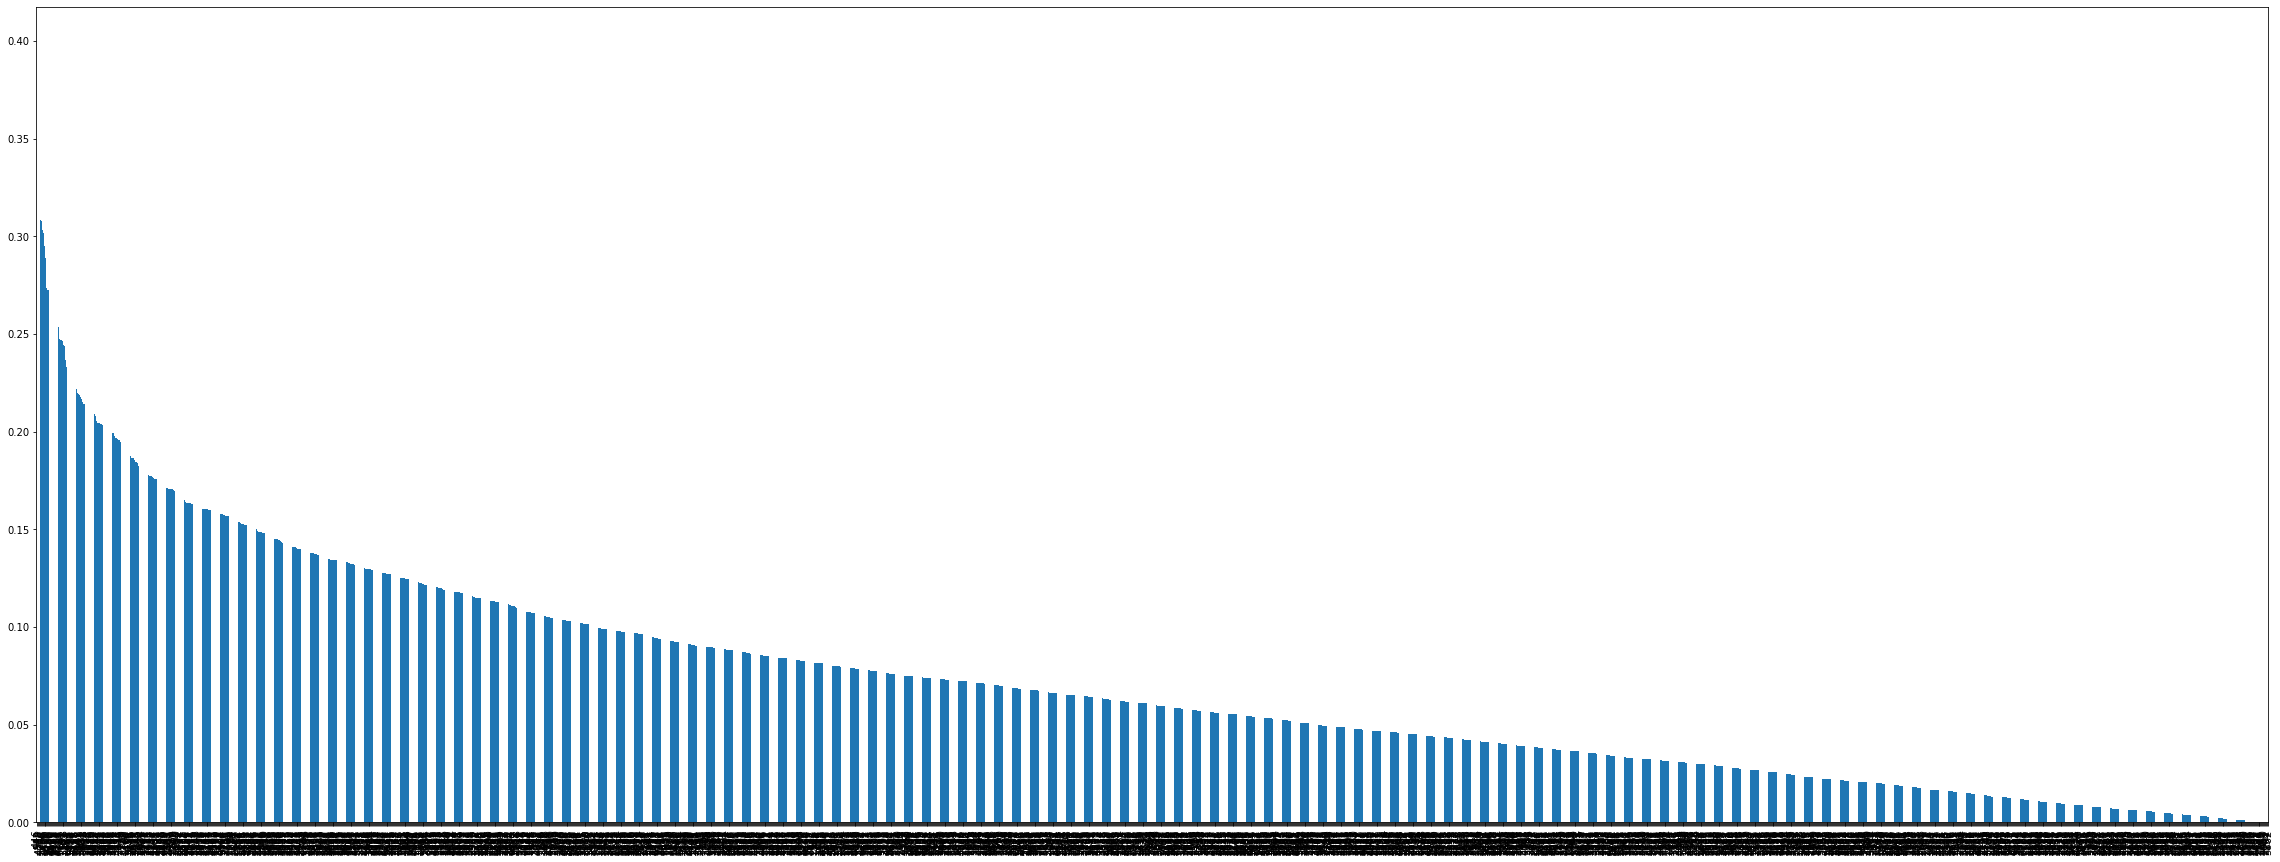

In [31]:
mutual_info=pd.Series(mutual_information)
mutual_info.index=required_features_t
mutual_info.sort_values(ascending=False,inplace=True)
mutual_info.plot.bar(figsize=(40,15))

In [32]:
required_indices = (-mutual_information).argsort()[:number_of_features_required_3]
selected_features_mi=[]
selected_indices=[]
for i in range(number_of_features_required_3):
    required_indices[i] = required_indices[i] 
    selected_indices.append(required_indices[i])
    selected_features_mi.append(feature_name[required_indices[i]])
    print('Selected Feature '+str(i+1)+ ' is : ', feature_name[required_indices[i]])

Selected Feature 1 is :  L27476_at
Selected Feature 2 is :  AC002464_at
Selected Feature 3 is :  M89955_at
Selected Feature 4 is :  L13436_at
Selected Feature 5 is :  M26683_at
Selected Feature 6 is :  L37882_at
Selected Feature 7 is :  L49169_at
Selected Feature 8 is :  J05272_at
Selected Feature 9 is :  HG2036-HT2090_at
Selected Feature 10 is :  D30742_at
Selected Feature 11 is :  D43949_at
Selected Feature 12 is :  AF009426_at
Selected Feature 13 is :  L33842_rna1_at
Selected Feature 14 is :  L13738_at
Selected Feature 15 is :  L11370_at
Selected Feature 16 is :  D00654_at
Selected Feature 17 is :  HG1116-HT1116_at
Selected Feature 18 is :  M32886_at
Selected Feature 19 is :  D13988_at
Selected Feature 20 is :  L31881_at
Selected Feature 21 is :  HG960-HT960_at
Selected Feature 22 is :  M12759_at
Selected Feature 23 is :  D90276_at
Selected Feature 24 is :  D38555_at
Selected Feature 25 is :  L00354_at
Selected Feature 26 is :  L38933_rna1_at
Selected Feature 27 is :  HG4433-HT4703_

Selected Feature 968 is :  L23959_at
Selected Feature 969 is :  HG4102-HT4372_at
Selected Feature 970 is :  D26561_cds3_at
Selected Feature 971 is :  HG3288-HT3465_at
Selected Feature 972 is :  D15057_at
Selected Feature 973 is :  HG3495-HT3689_at
Selected Feature 974 is :  D28114_at
Selected Feature 975 is :  M60459_at
Selected Feature 976 is :  D87009_cds3_at
Selected Feature 977 is :  D86969_at
Selected Feature 978 is :  L76200_at
Selected Feature 979 is :  M29194_at
Selected Feature 980 is :  M25077_at
Selected Feature 981 is :  L27586_at
Selected Feature 982 is :  D31886_at
Selected Feature 983 is :  L37362_at
Selected Feature 984 is :  D21261_at
Selected Feature 985 is :  HG2188-HT2258_at
Selected Feature 986 is :  M25393_at
Selected Feature 987 is :  L24564_at
Selected Feature 988 is :  L41939_at
Selected Feature 989 is :  D87682_at
Selected Feature 990 is :  HG3039-HT3200_at
Selected Feature 991 is :  D86983_at
Selected Feature 992 is :  M22324_at
Selected Feature 993 is :  M21

In [33]:
required_features_mi = selected_features_mi
print('Length of required features : '+str(len(required_features_mi)))
print(required_features_mi)

Length of required features : 1343
['L27476_at', 'AC002464_at', 'M89955_at', 'L13436_at', 'M26683_at', 'L37882_at', 'L49169_at', 'J05272_at', 'HG2036-HT2090_at', 'D30742_at', 'D43949_at', 'AF009426_at', 'L33842_rna1_at', 'L13738_at', 'L11370_at', 'D00654_at', 'HG1116-HT1116_at', 'M32886_at', 'D13988_at', 'L31881_at', 'HG960-HT960_at', 'M12759_at', 'D90276_at', 'D38555_at', 'L00354_at', 'L38933_rna1_at', 'HG4433-HT4703_at', 'D43636_at', 'D49818_at', 'L05147_at', 'D50924_at', 'D14661_at', 'M81757_at', 'D88146_at', 'D88460_at', 'HG4638-HT5050_at', 'HG3578-HT3781_at', 'J05070_at', 'M22632_at', 'D86963_at', 'M94547_at', 'L06499_at', 'L24804_at', 'M23294_at', 'D63476_at', 'M36067_at', 'HG3790-HT4060_at', 'L27050_at', 'HG2442-HT2538_at', 'D64110_at', 'J04739_at', 'L43366_at', 'M18533_at', 'M94856_at', 'D90224_at', 'L39211_at', 'M33987_at', 'M59488_at', 'M31013_at', 'M57471_at', 'D86425_at', 'M63180_at', 'L41870_at', 'M85247_at', 'M57230_at', 'AF015913_at', 'M16279_at', 'L38608_at', 'J02874_at

In [34]:
X_train3 = X_train[required_features_mi]
X_train3.head()

,L27476_at,AC002464_at,M89955_at,L13436_at,M26683_at,L37882_at,L49169_at,J05272_at,HG2036-HT2090_at,D30742_at,...,HG1098-HT1098_at,HG4582-HT4987_at,AB000896_at,AF010193_at,L06845_at,L18960_at,D31764_at,D79991_at,L48516_at,M13666_at
22,-0.737653,0.091918,0.676196,-0.361145,-0.869397,-0.464164,-0.275168,-1.046479,0.286059,1.153409,...,0.850906,0.111683,-0.703728,-0.723779,-0.036182,-0.418335,0.961129,-1.236751,1.379067,-1.280229
41,0.138316,0.714343,1.363522,-0.094097,-1.413111,0.293053,-0.353112,1.586268,0.180432,-0.303292,...,-0.670132,-0.347276,0.754219,-0.417481,-0.815466,-0.247860,1.074404,-0.456880,-0.558180,-0.776192
50,1.152979,-1.210684,0.891503,0.211603,-0.761680,0.832570,-0.398580,0.910921,2.382097,-0.297511,...,0.604251,0.369638,-0.901158,-0.030779,0.559384,0.131554,0.236615,1.478530,0.759598,-0.036572
38,-0.087976,-0.575425,-3.000588,2.748563,0.869463,-2.243624,1.416878,0.950777,-0.040725,0.003078,...,-0.489252,-0.578430,-1.592164,0.459298,-0.534843,-0.377246,-2.563865,2.472390,-0.963650,1.749473
61,0.204013,-1.993528,-0.470729,1.146273,2.305690,-0.823842,-0.992907,-0.291419,-1.430381,0.893284,...,-1.796523,-0.534879,1.088332,-0.314105,-1.306051,-1.032916,-1.065490,0.151799,-2.450374,1.448146


In [35]:
X_test3 = X_test[required_features_mi]
X_test3.head()

,L27476_at,AC002464_at,M89955_at,L13436_at,M26683_at,L37882_at,L49169_at,J05272_at,HG2036-HT2090_at,D30742_at,...,HG1098-HT1098_at,HG4582-HT4987_at,AB000896_at,AF010193_at,L06845_at,L18960_at,D31764_at,D79991_at,L48516_at,M13666_at
48,-1.066141,0.951763,0.531277,-0.803883,-1.084831,-0.610875,-0.908467,-1.467187,-0.133148,0.159153,...,0.061610,-0.501379,1.012397,0.685194,0.246459,0.096585,0.873649,-0.017014,1.379067,-0.776192
74,-0.577058,-0.074918,0.473310,-0.610625,-1.007890,1.092863,-0.463534,-1.535829,0.520419,-0.245486,...,-1.360766,0.580693,0.237863,-0.176271,0.708780,-0.112355,1.482644,-1.165421,-0.377971,-0.321462
59,-0.511361,-0.697343,-1.294693,0.506762,0.356525,-2.309880,0.413342,-1.059764,0.147424,-0.823542,...,0.061610,-0.699033,-0.969499,0.095569,-1.039560,-0.821353,-1.010535,-0.877725,-0.130183,0.746877
54,0.459504,0.823428,0.721741,-0.336549,0.453983,0.529683,0.007381,0.222288,0.315767,-0.245486,...,0.818019,1.066452,-0.817630,0.474613,-0.876032,0.320387,0.702054,-0.247647,0.016236,-0.874807
34,0.488703,-0.979681,-1.725307,0.851114,1.038733,-1.254509,1.566271,2.640252,-0.733903,-0.638564,...,-0.053495,-1.003889,2.569060,-0.115011,-1.830956,1.128173,-0.114426,1.219366,-2.078693,1.239957


In [36]:
X_test3.shape

(16, 1343)

In [37]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train3)

y_test3 = np.array([a+1 for a in y_test])

print(y_test3)

[1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1]
[1 2 2 1 1 1 2 1 1 2 1 2 1 1 1 1]


# KNN Classifier

In [38]:
temp_fscore=0
temp_cm = np.zeros([2,2])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
     
    f_score_knn = f1_score(y_test3, y_test_prediction,average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 93.7500
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 88.5246
Testing accuracy on selected features for 2 neighbors: 81.2500
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 90.1639
Testing accuracy on selected features for 3 neighbors: 87.5000
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 88.5246
Testing accuracy on selected features for 4 neighbors: 87.5000
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 91.8033
Testing accuracy on selected features for 5 neighbors: 93.7500
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 85.2459
Testing accuracy on selected features for 6 neighbors: 75.0000
KNN Classfier for 7 neighbors:
Training accuracy on

In [39]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[10  1]
 [ 0  5]]
Average Confusion matrix is : [[10.63157895  0.36842105]
 [ 3.36842105  1.63157895]]


Confusion Matrix of KNN Classifier:


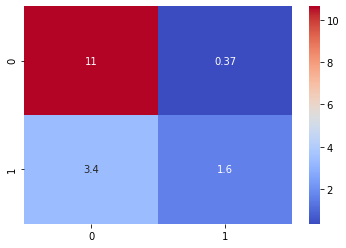

In [40]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [41]:
f_score_knn = f1_score(y_test3, max_y_test_prediction,average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.9375
Average F-Score is : 0.7664473684210527


# SVM(Support Vector Machine)

In [42]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 98.3607
Testing accuracy on selected features: 68.7500


In [43]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[11  0]
 [ 5  0]]


Confusion Matrix of SVM Classifier:


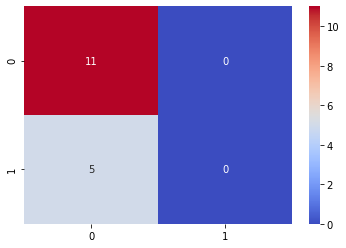

In [44]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [45]:
f_score_svc = f1_score(y_test3, y_test_prediction_svc,average='micro')

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.6875
